# インポート

In [ ]:
import numpy as np
import glob
import os
import shutil

from PIL import Image
import cv2

from matplotlib import pyplot as plt

from torch.utils import data as data
from torchvision import transforms as transforms
import random

# 関数

In [ ]:
# 同じ大きさの複数枚の画像をタイル上に並べる。
def tile_imgs(imgs, n_cols=2):
    n_rows = int(np.ceil(len(imgs) / n_cols))
    w, h = imgs[0].size
    
    # 結合後の画像
    concat_img = Image.new("RGB", (w * n_cols, h * n_rows))

    for i, img in enumerate(imgs):
        row, col = i % n_cols, i // n_cols
        concat_img.paste(img, (w * row, h * col))

    return concat_img

In [ ]:
# コントラストと明度を指定して変更（使ってない）
def adjust(img, contrast, brightness): # imgはPIL.Image
    img = np.array(img)
    # 積和演算を行う。
    dst = contrast * img + brightness
    # [0, 255] でクリップし、uint8 型にする
    img = np.clip(dst, 0, 255).astype(np.uint8)
    img = Image.fromarray(img)

    return img

# 水増し&保存

(400, 200)
(400, 200)
(400, 200)


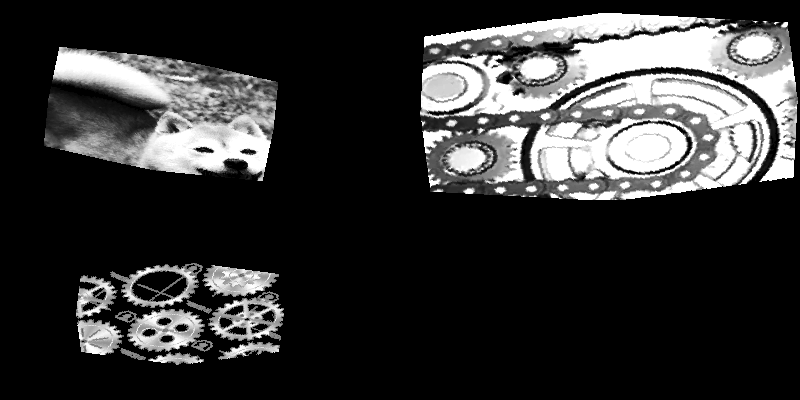

In [ ]:
# 画像読み込み
BASE_PATH = r"xxxxxx"
SAVE_PATH = r"xxxxxx"

types = ['jpg', 'png']
files = []
for type in types:
    files += glob.glob(BASE_PATH + "/*" + type)

# 水増し実行
imgs = [] # 表示用
for file in files: 
    img = Image.open(file).convert("RGB") # PNGファイルにAlpha値が含まれているとエラーになるので、RGBに変換処理も入れる
    
    transform = transforms.Compose(
        [
            transforms.Grayscale(num_output_channels=1), # グレースケール
            transforms.RandomHorizontalFlip(p=0.5), # 左右反転
            transforms.RandomVerticalFlip(p=0.5), # 上下反転
            transforms.RandomResizedCrop(size=(200, 400) , scale=(0.3, 2.0), ratio=(3/4, 4/3)),
            transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.25), # hueは-0.5-0.5の範囲、それ以外は0以上
            transforms.RandomEqualize(p=1), # 平滑化
            transforms.RandomRotation(degrees=20), # 回転
            transforms.RandomAffine(degrees=[-10, 10], translate=(0.1, 0.1), scale=(0.5, 1.5)), # アフィン変換
        ])
    
    img = transform(img)
    print(img.size)

    # 保存
    img.save(SAVE_PATH + file.split("\\")[-1] + "_augmented.jpg")
    # 表示用
    imgs.append(img)

display(tile_imgs(imgs))